In [ ]:
!pip install requests

In [ ]:
!pip install beautifulsoup4


In [ ]:
!pip install lxml

In [ ]:
!pip install pandas

In [ ]:
!pip install seaborn

In [ ]:
!pip install matplotlib

In [86]:
url = "https://www.worldometers.info/coronavirus/"

In [87]:
import requests
content = requests.get(url).content

In [88]:
type(content)

bytes

In [89]:
from bs4 import BeautifulSoup

In [90]:
soup = BeautifulSoup(content, 'html.parser')


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon
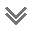

In [91]:
soup

In [92]:
tbody = soup.find('tbody')

In [93]:
table_row = tbody.find_all('tr')

In [94]:
table_row[2]

<tr class="total_row_world row_continent" data-continent="Europe" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>Europe</nobr>
</td>
<td>247,297,727</td>
<td></td>
<td>2,025,440</td>
<td></td>
<td>242,870,525</td>
<td>+10,554</td>
<td>2,401,762</td>
<td>6,456</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="Europe" style="display:none;">Europe</td>
<!-- 1 Case every X -->
<td>
</td>
<!-- 1 Death every X -->
<td></td>
<!-- 1 test every X -->
<td></td>
<td></td>
<td></td>
<td></td>
</tr>

In [99]:
all_country_data = []
for i in range(8, len(table_row)):
    country = []
    country_data_row = table_row[i].find_all('td')
    for tag in country_data_row:
        country.append(tag.text)
    all_country_data.append(country)

In [100]:
all_country_data[0][1:7]

['USA',
 '105,972,038',
 '',
 '1,151,642                                ',
 '',
 '103,587,178']

In [101]:
data = list(map(lambda x: x[1:7], all_country_data ))

In [102]:
data

[['USA',
  '105,972,038',
  '',
  '1,151,642                                ',
  '',
  '103,587,178'],
 ['India',
  '44,695,420',
  '',
  '530,802                                ',
  '',
  '44,158,703'],
 ['France',
  '39,703,279',
  '',
  '165,314                                ',
  '',
  '39,451,266'],
 ['Germany',
  '38,297,037',
  '',
  '169,661                                ',
  '',
  '37,936,100'],
 ['Brazil',
  '37,145,514',
  '',
  '699,634                                ',
  '',
  '36,249,161'],
 ['Japan',
  '33,374,303',
  '',
  '73,511                                ',
  '',
  '21,709,584'],
 ['S. Korea',
  '30,702,960',
  '+3,930',
  '34,171                                ',
  '+9',
  '30,499,411'],
 ['Italy',
  '25,651,205',
  '',
  '188,750                                ',
  '',
  '25,320,467'],
 ['UK',
  '24,423,396',
  '',
  '208,458                                ',
  '',
  '24,158,042'],
 ['Russia',
  '22,506,199',
  '',
  '396,834                                ',


In [103]:
import pandas as pd

In [104]:
df = pd.DataFrame(data)

In [105]:
df.head()

,0,1,2,3,4,5
0,USA,"105,972,038",,"1,151,642",,"103,587,178"
1,India,"44,695,420",,"530,802",,"44,158,703"
2,France,"39,703,279",,"165,314",,"39,451,266"
3,Germany,"38,297,037",,"169,661",,"37,936,100"
4,Brazil,"37,145,514",,"699,634",,"36,249,161"


In [106]:
column = ['country',
          'Total Cases', 
          'New Cases', 
          'Total Death', 
          'New Death',
          'Total Recovered']

In [107]:
df.columns = column

In [108]:
df.head()

,country,Total Cases,New Cases,Total Death,New Death,Total Recovered
0,USA,"105,972,038",,"1,151,642",,"103,587,178"
1,India,"44,695,420",,"530,802",,"44,158,703"
2,France,"39,703,279",,"165,314",,"39,451,266"
3,Germany,"38,297,037",,"169,661",,"37,936,100"
4,Brazil,"37,145,514",,"699,634",,"36,249,161"


In [109]:
df.to_csv('covid-mar-20.csv', index = False)

In [110]:
#csv : comma seperated value

In [111]:
df = pd.read_csv('covid-mar-20.csv', na_values = ['',' '])

In [112]:
df.head(2)

,country,Total Cases,New Cases,Total Death,New Death,Total Recovered
0,USA,"105,972,038",NaN,"1,151,642",NaN,"103,587,178"
1,India,"44,695,420",NaN,"530,802",NaN,"44,158,703"


In [113]:
# NaN is a missing data

In [114]:
df.shape #231 rows and 6 column

(231, 6)

In [115]:
df.isna()

,country,Total Cases,New Cases,Total Death,New Death,Total Recovered
0,False,False,True,False,True,False
1,False,False,True,False,True,False
2,False,False,True,False,True,False
3,False,False,True,False,True,False
4,False,False,True,False,True,False
...,...,...,...,...,...,...
226,False,False,True,True,True,False
227,False,False,True,False,True,False
228,False,False,True,False,True,False
229,False,False,True,True,True,True


In [116]:
df.isna().sum() #how many missing rows in each column

country              0
Total Cases          0
New Cases          229
Total Death          6
New Death          230
Total Recovered     21
dtype: int64

<Axes: >

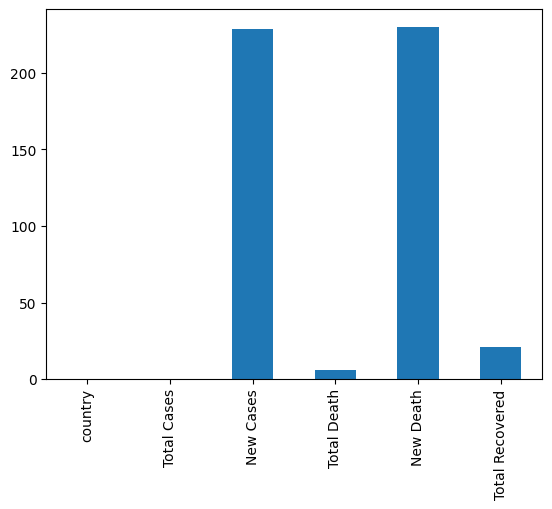

In [117]:
df.isna().sum().plot.bar()

<Axes: >

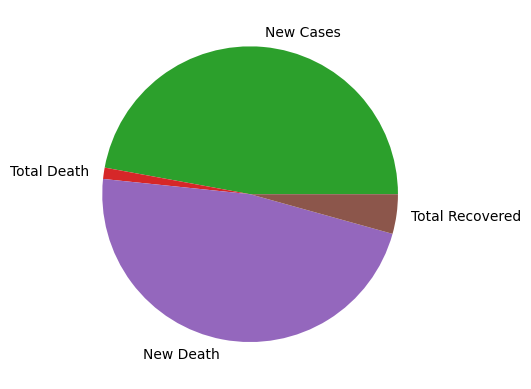

In [118]:
df.isna().sum().plot.pie()

In [119]:
import seaborn as sns

<Axes: >

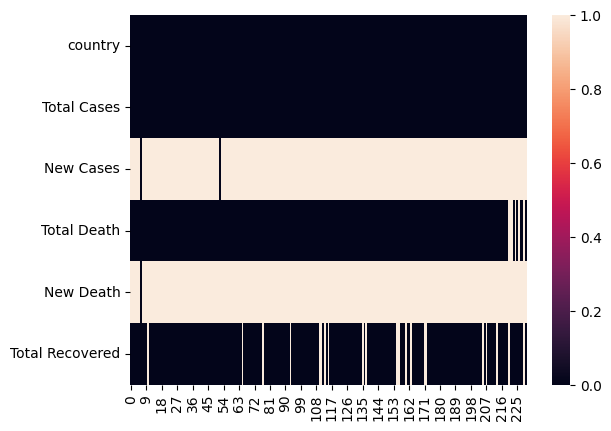

In [120]:
sns.heatmap(df.isna().transpose())

In [123]:
df.head()

,country,Total Cases,New Cases,Total Death,New Death,Total Recovered
0,USA,"105,972,038",NaN,"1,151,642",NaN,"103,587,178"
1,India,"44,695,420",NaN,"530,802",NaN,"44,158,703"
2,France,"39,703,279",NaN,"165,314",NaN,"39,451,266"
3,Germany,"38,297,037",NaN,"169,661",NaN,"37,936,100"
4,Brazil,"37,145,514",NaN,"699,634",NaN,"36,249,161"


In [125]:
df[df['country'] == 'China']

,country,Total Cases,New Cases,Total Death,New Death,Total Recovered
230,China,"503,302",NaN,"5,272",NaN,"379,053"


In [126]:
df[df['country'] == 'Nepal']

,country,Total Cases,New Cases,Total Death,New Death,Total Recovered
72,Nepal,"1,001,182",NaN,"12,020",NaN,"989,145"
